In [1]:
import numpy as np
from lattice import Lattice2D, BrickwallLattice, SquareLattice
import matplotlib.pyplot as plt

In [2]:
from multiprocessing import Process

def E(t):
    return np.cos(t)

def run_simulation(lattice, lattice_file, video_file):
    lattice.evolve(options={"progress_bar": True})
    lattice.save(lattice_file)
    lattice.save_current_density_animation(video_file, sample_every=37, fps=10)

l = Lattice2D(
    dimensions=(6, 10),
    t_hop=1,
    E_amplitude=E,
    E_dir=np.array([1, 0]),
    h=5e-3,
    T=30,
    initial_occupation=0.5,
)

b = BrickwallLattice(
    dimensions=(7, 8),
    t_hop=1,
    E_amplitude=E,
    E_dir=np.array([1, 0]),
    h=5e-3,
    T=30,
    initial_occupation=0.5,
)


run_simulation(b, "sim_pol_results/brick.lattice", "sim_pol_results/brick.mp4")
run_simulation(l, "sim_pol_results/rect.lattice", "sim_pol_results/rect.mp4")

1
1
Creating Hamiltonians...
Done.
Calculating energy eigenstates...
Done.
50 % of states were set as initially occupied.
1
1
Creating Hamiltonians...
Done.
Calculating energy eigenstates...
Done.
50 % of states were set as initially occupied.
10.0%. Run time:   5.88s. Est. time left: 00:00:00:52
20.0%. Run time:  11.40s. Est. time left: 00:00:00:45
30.0%. Run time:  17.37s. Est. time left: 00:00:00:40
40.0%. Run time:  23.31s. Est. time left: 00:00:00:34
50.0%. Run time:  29.38s. Est. time left: 00:00:00:29
60.0%. Run time:  35.61s. Est. time left: 00:00:00:23
70.0%. Run time:  41.79s. Est. time left: 00:00:00:17
80.0%. Run time:  48.34s. Est. time left: 00:00:00:12
90.0%. Run time:  54.83s. Est. time left: 00:00:00:06
100.0%. Run time:  60.88s. Est. time left: 00:00:00:00
Total run time:  60.88s


Generating animation:  99%|█████████▉| 161/162 [00:37<00:00,  4.31frame/s]


10.0%. Run time:   8.34s. Est. time left: 00:00:01:15
20.0%. Run time:  15.80s. Est. time left: 00:00:01:03
30.0%. Run time:  22.77s. Est. time left: 00:00:00:53
40.0%. Run time:  29.86s. Est. time left: 00:00:00:44
50.0%. Run time:  37.12s. Est. time left: 00:00:00:37
60.0%. Run time:  44.29s. Est. time left: 00:00:00:29
70.0%. Run time:  51.88s. Est. time left: 00:00:00:22
80.0%. Run time:  59.80s. Est. time left: 00:00:00:14
90.0%. Run time:  67.68s. Est. time left: 00:00:00:07
100.0%. Run time:  75.24s. Est. time left: 00:00:00:00
Total run time:  75.24s


Generating animation:  99%|█████████▉| 161/162 [00:58<00:00,  2.77frame/s]


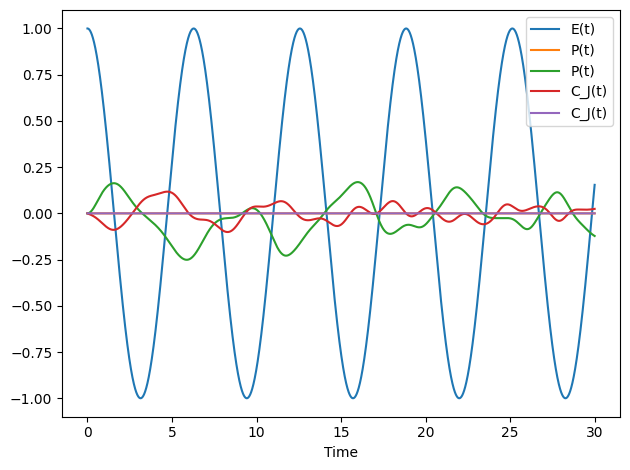

6385


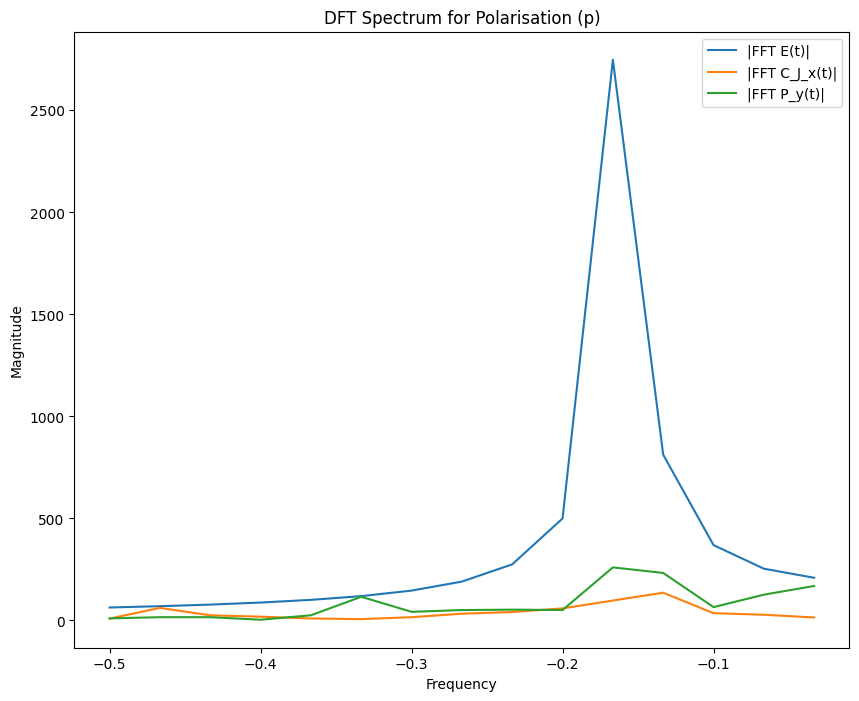

In [54]:
t = np.linspace(0, l.steps*l.h, l.steps)
P = [b.states[i].polarisation for i in range(l.steps)]
C_J = [b.states[i].curl_polarisation for i in range(l.steps)]

plt.plot(t, E(t), label="E(t)")
plt.plot(t, P, label="P(t)")
plt.plot(t, C_J, label="C_J(t)")

plt.xlabel("Time")
plt.tight_layout()
plt.legend()
plt.show()


# Compute FFT on the signals
dt = l.h
N = len(t)
freq = np.fft.fftfreq(N, d=dt)

# Evaluate E(t) and convert P and C_J to arrays (each sample is a 2-component vector)
E_vals = E(t)
P_arr = np.array(P)       # shape: (N, 2)
C_J_arr = np.array(C_J)   # shape: (N, 2)

# Compute FFTs: for vector signals we compute FFT on each component
E_fft = np.fft.fft(E_vals)
P_fft = np.fft.fft(P_arr, axis=0)
C_J_fft = np.fft.fft(C_J_arr, axis=0)

# Create a new figure with two subplots:
plt.figure(figsize=(10, 8))

r = 400
R = np.argmax(np.abs(E_fft)) + 390
print(R)

plt.plot(freq[R-r:R+r], np.abs(E_fft)[R-r:R+r], label="|FFT E(t)|")
plt.plot(freq[R-r:R+r], np.abs(C_J_fft[:, 0])[R-r:R+r], label="|FFT C_J_x(t)|")
plt.title("DFT Spectrum for Lattice Signals (l)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.plot(freq[R-r:R+r], np.abs(P_fft[:, 1])[R-r:R+r], label="|FFT P_y(t)|")
plt.title("DFT Spectrum for Polarisation (p)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


In [ ]:
l = BrickwallLattice(
    dimensions=(7, 12),
    t_hop=1,
    E_amplitude=cos_func,
    E_dir=np.array([1, 0]),
    h=2e-3,
    T=12,
    initial_occupation=0.5,
)

l.evolve(options={"progress_bar": True})
l.save_current_density_animation("polarized-bw-lattice.gif", sample_every=97, curl_norm=l.maximum_curl, fps=15)

Creating Hamiltonians...
Done.
Calculating energy eigenstates...
Done.
50 % of states were set as initially occupied.
10.0%. Run time:  15.29s. Est. time left: 00:00:02:17
20.0%. Run time:  23.38s. Est. time left: 00:00:01:33
30.0%. Run time:  35.52s. Est. time left: 00:00:01:22
40.0%. Run time:  44.99s. Est. time left: 00:00:01:07
50.0%. Run time:  55.74s. Est. time left: 00:00:00:55
60.0%. Run time:  70.70s. Est. time left: 00:00:00:47
70.0%. Run time:  80.51s. Est. time left: 00:00:00:34
80.0%. Run time:  95.28s. Est. time left: 00:00:00:23
90.0%. Run time: 108.94s. Est. time left: 00:00:00:12
100.0%. Run time: 119.54s. Est. time left: 00:00:00:00
Total run time: 119.54s


Generating animation:  98%|█████████▊| 60/61 [00:23<00:00,  2.56frame/s]


In [ ]:
class BrickwallLattice(Lattice2D):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.cell_path = np.array([(0, 1), (1, 2), (2, self.Lx+2), (self.Lx+2, self.Lx+1), (self.Lx+1, self.Lx), (self.Lx, 0)])


    def get_brickwall_lattice_sites(self) -> np.ndarray:
        if self.Lx % 2 == 0:
            y_hop_row = np.tile([0, 1], self.Lx//2)
            y_hop = np.concatenate([y_hop_row, 1 - y_hop_row] * (self.Ly // 2 - 1) + [y_hop_row])
        else:
            y_hop = np.tile([0, 1], (self.Ly-1)*self.Lx//2)
            y_hop = np.concatenate([y_hop, [0] * (1- self.Ly % 2)])
        
        erase_positions = np.diag(y_hop, self.Lx) + np.diag(y_hop, -self.Lx)
        return 1-erase_positions
    
    
    def create_hopping_hamiltonian(self):
        return super().create_hopping_hamiltonian() * self.get_brickwall_lattice_sites()
    
    def curl(self, J: np.ndarray) -> np.ndarray:
        cell_width = (self.cell_path.flatten() % self.Lx).max()
        cell_height = (self.cell_path.flatten() // self.Lx).max()
        curl = dict()
        # curl_row_length = self.L-cell_width

        for i in range(0, self.Ly - cell_height, cell_height):
            for j in range(i%2, self.Lx - cell_width, cell_width):
                site_index = self.Lx * i + j
                curl[site_index] = sum([J[site_index + di, site_index + dj] for di, dj in self.cell_path])
        return curl
    
    
        
    

class SquareLattice(Lattice2D):
    def __init__(self, L: int, *args, **kwargs):
        super().__init__(dimensions=(L, L), *args, **kwargs)
        self.L = L

